In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)
df.head()

Saving heart_disease.csv to heart_disease.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
condition
0    160
1    137
Name: count, dtype: int64


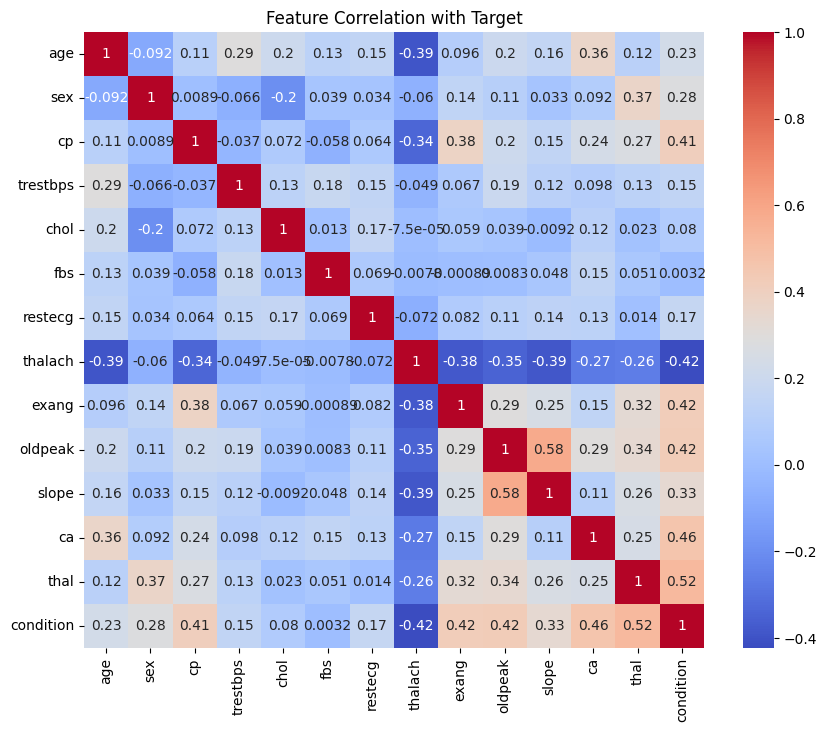

In [4]:
# Check for missing values
print(df.isnull().sum())

# Check class balance
print(df['condition'].value_counts())

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target')
plt.show()

In [7]:
# Features and target
X = df.drop('condition', axis=1)
y = df['condition']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [10]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



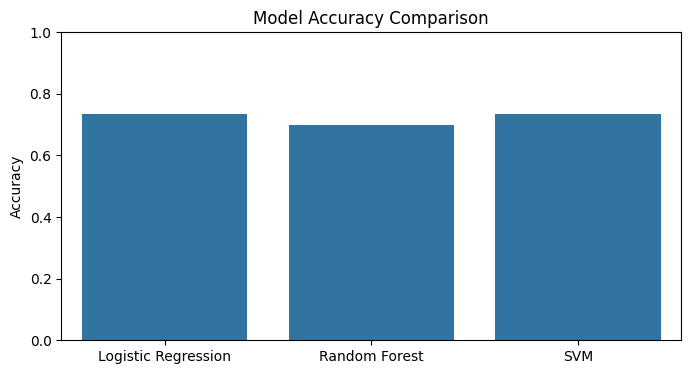

In [12]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()


In [13]:
print("Logistic Regression Coefficients:")
print(pd.DataFrame(lr.coef_.T, index=X.columns, columns=['Coefficient']))

Logistic Regression Coefficients:
          Coefficient
age         -0.100348
sex          0.876195
cp           0.351773
trestbps     0.556786
chol         0.342367
fbs         -0.393429
restecg      0.262141
thalach     -0.736152
exang        0.349048
oldpeak      0.503770
slope        0.279327
ca           1.181037
thal         0.740615


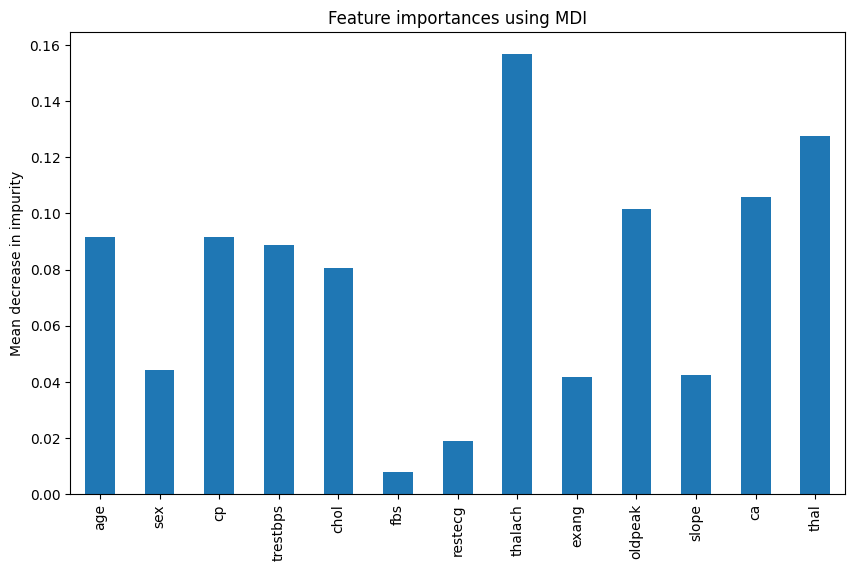

In [15]:
# Feature importance for Random Forest
importances = rf.feature_importances_
feature_names = X.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

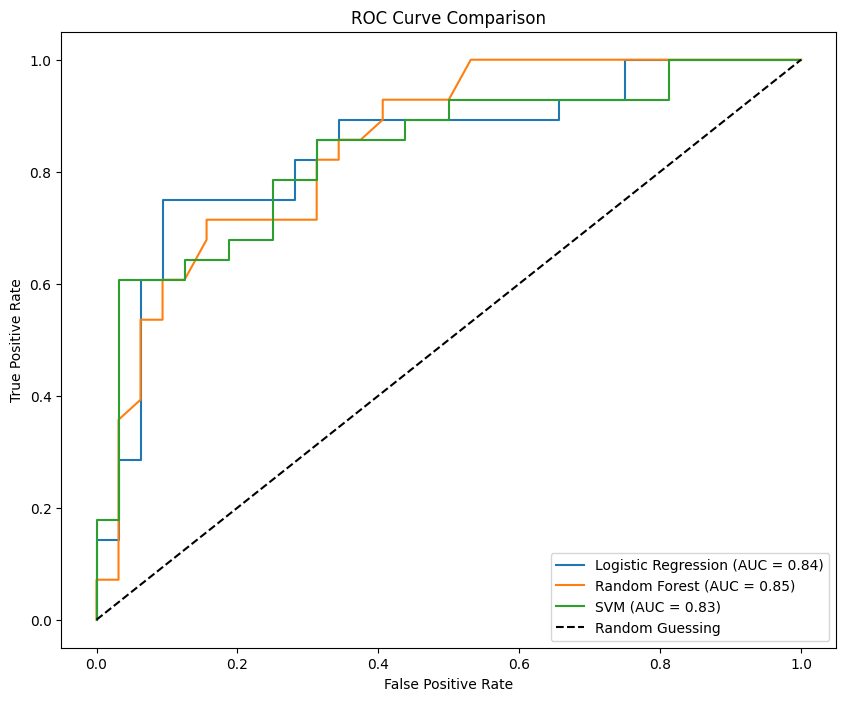

In [16]:
# ROC curves and AUC scores
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [17]:
# Cross-validation scores
cv_scores_lr = cross_val_score(lr, X_scaled, y, cv=5)
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=5)
cv_scores_svm = cross_val_score(svm, X_scaled, y, cv=5)

print("Logistic Regression Cross-validation Scores:", cv_scores_lr)
print("Random Forest Cross-validation Scores:", cv_scores_rf)
print("SVM Cross-validation Scores:", cv_scores_svm)

print("\nLogistic Regression Mean CV Score:", np.mean(cv_scores_lr))
print("Random Forest Mean CV Score:", np.mean(cv_scores_rf))
print("SVM Mean CV Score:", np.mean(cv_scores_svm))

Logistic Regression Cross-validation Scores: [0.61666667 0.88333333 0.81355932 0.91525424 0.76271186]
Random Forest Cross-validation Scores: [0.56666667 0.83333333 0.81355932 0.91525424 0.57627119]
SVM Cross-validation Scores: [0.65       0.88333333 0.79661017 0.93220339 0.71186441]

Logistic Regression Mean CV Score: 0.7983050847457627
Random Forest Mean CV Score: 0.7410169491525425
SVM Mean CV Score: 0.7948022598870056
